# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [2]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [3]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mplt
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
import sklearn
from PIL import Image
import cv2
import os

Load the dataset.

In [4]:
# Load and unzip the dataset
import zipfile
# Load and unzip the dataset
with zipfile.ZipFile('/content/drive/MyDrive/data.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [6]:
# Create a function to load the raw images
def load_images_with_pil(folder_path):
    """
    Loads all images from a specified folder using Pillow
    and returns them as a list of Image objects.

    Parameters:
    - folder_path (str): The path to the folder containing the images.

    Returns:
    - list: A list of Pillow Image objects.
    """
    images = []
    # List all files in the directory
    for filename in os.listdir(folder_path):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Check if the file is an image
        if file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                # Open the image file
                with Image.open(file_path) as img:
                    # Ensure the image is in RGB format, as some images might be
                    img_rgb = img.convert('RGB')
                    images.append(img_rgb)
            except Exception as e:
                print(f"Error processing image {file_path}: {e}")
    return images

# images = load_images_with_pil("/content/data/Cardboard")
# print(len(images))

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Categories found: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Label map created: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}

Starting to load images and labels...
/content/data/Cardboard
Loaded 540 images from 'Cardboard' category.
/content/data/Food_Waste
Loaded 1000 images from 'Food_Waste' category.
/content/data/Glass
Loaded 750 images from 'Glass' category.
/content/data/Metal
Loaded 1000 images from 'Metal' category.
/content/data/Other
Loaded 1010 images from 'Other' category.
/content/data/Paper
Loaded 1030 images from 'Paper' category.
/content/data/Plastic
Loaded 2295 images from 'Plastic' category.

--- Verification ---
Successfully loaded 7625 images and 7625 labels.
Shape of the images array (X): (7625, 256, 256, 3)
Shape of the labels array (y): (7625,)

Displaying 5 random sample images with their labels...


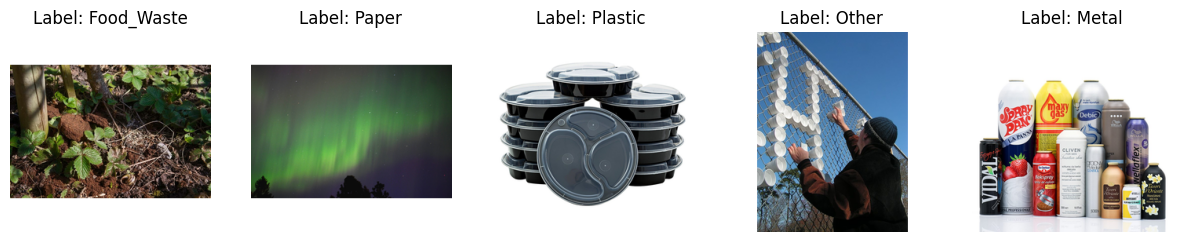

In [7]:
# Get the images and their labels

import numpy as np
import os
import matplotlib.pyplot as plt


DATASET_PATH = '/content/data'
categories = sorted([d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))])
print(f"Categories found: {categories}")


# Create a mapping from category name to integer index
label_map = {category: i for i, category in enumerate(categories)}
print(f"Label map created: {label_map}")

# --- 2. Load Images and Corresponding Labels ---

all_images = []
all_labels = []

print("\nStarting to load images and labels...")

for category in categories:
    folder_path = os.path.join(DATASET_PATH, category)

    # Get the integer label for the current category
    label = label_map[category]

    print(folder_path)
    # Load all images from the current category's folder
    images_in_folder = load_images_with_pil(folder_path)

    print(f"Loaded {len(images_in_folder)} images from '{category}' category.")

    # Extend our main lists
    all_images.extend(images_in_folder)
    all_labels.extend([label] * len(images_in_folder))

X = np.array([np.array(img) for img in all_images])
y = np.array(all_labels)

# --- 3. Verification ---

print("\n--- Verification ---")

# Check if the number of images matches the number of labels
if len(X) == len(y):
    print(f"Successfully loaded {len(X)} images and {len(y)} labels.")
    print(f"Shape of the images array (X): {X.shape}") # Should be (num_images, height, width, channels)
    print(f"Shape of the labels array (y): {y.shape}")   # Should be (num_images,)
else:
    print(f"Error: Mismatch between number of images ({len(X)}) and labels ({len(y)}).")

# Create a reverse map to get category name from integer index for display
reverse_label_map = {i: category for category, i in label_map.items()}

# Display a few sample images to visually verify correctness
print("\nDisplaying 5 random sample images with their labels...")

plt.figure(figsize=(15, 5))
for i in range(5):
    # Choose a random index
    idx = np.random.randint(0, len(X))

    plt.subplot(1, 5, i + 1)
    plt.imshow(X[idx])
    plt.title(f"Label: {reverse_label_map[y[idx]]}")
    plt.axis('off')

plt.show()

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

/tmp/ipython-input-8-253176208.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_names, y=class_counts, palette="viridis")


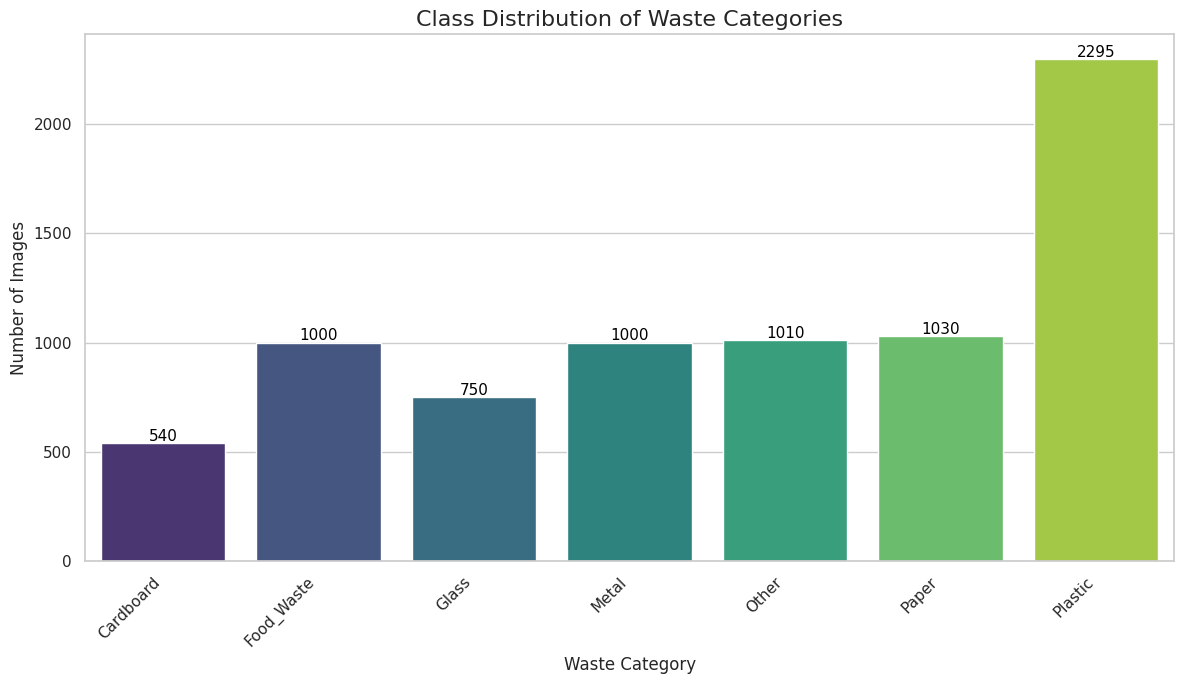

In [8]:
# Visualise Data Distribution
# Get the unique labels and their counts
unique_labels, class_counts = np.unique(y, return_counts=True)

# Map the integer labels back to their string names for the plot
class_names = [categories[label] for label in unique_labels]

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")
barplot = sns.barplot(x=class_names, y=class_counts, palette="viridis")

# Add a title and labels for clarity
plt.title('Class Distribution of Waste Categories', fontsize=16)
plt.xlabel('Waste Category', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)

# Rotate x-axis labels for better readability if they are long
plt.xticks(rotation=45, ha='right')

# Add the count numbers on top of each bar
for index, value in enumerate(class_counts):
    barplot.text(index, value + 10, str(value), color='black', ha="center", fontsize=11)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Display the plot
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

Preparing to visualize one sample image from each category...


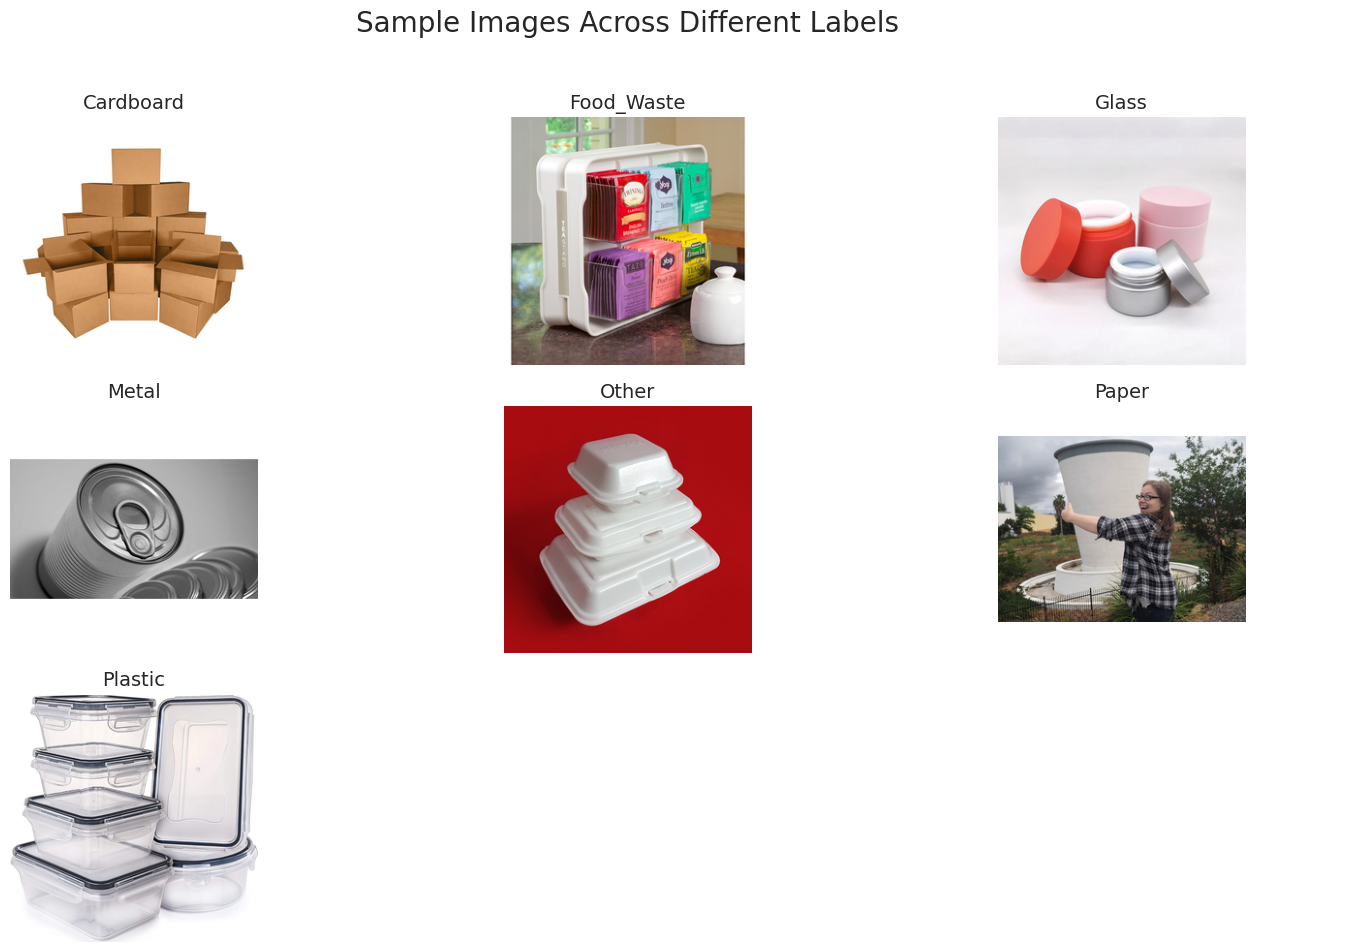

In [9]:
# Visualise Sample Images (across different labels)
print("Preparing to visualize one sample image from each category...")

# Find the unique labels and the first index where each occurs
unique_labels, first_indices = np.unique(y, return_index=True)

# Set up the plot. For 6 categories, a 2x3 grid is suitable.
num_categories = len(unique_labels)
rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle('Sample Images Across Different Labels', fontsize=20, y=0.95)

# Flatten the axes array for easy iteration, and turn off all axes
axes = axes.flatten()
for ax in axes:
    ax.axis('off')

# Iterate through the unique labels and their corresponding indices
for i, index in enumerate(first_indices):
    # Get the image from the dataset
    image = X[index]

    # Get the corresponding label name
    label_name = categories[y[index]]

    # Display the image on the correct subplot
    ax = axes[i]
    ax.imshow(image)
    ax.set_title(label_name, fontsize=14)
    ax.axis('off') # Turn off axis ticks and labels

plt.tight_layout(rect=[0, 0, 1, 0.93]) # Adjust layout to make space for the suptitle
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [10]:
# Find the smallest and largest image dimensions from the data set
min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0
min_dim_file = ""
max_dim_file = ""
image_count = 0
error_count = 0

print(f"Scanning images in: {DATASET_PATH}\n")

for root, _, files in os.walk(DATASET_PATH):
    for filename in files:
        # Check for common image file extensions
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_count += 1
            file_path = os.path.join(root, filename)

            try:
                # Open the image file to read its properties
                with Image.open(file_path) as img:
                    width, height = img.size

                    # Check for new minimum width or height
                    if width < min_width:
                        min_width = width
                        min_dim_file = file_path # Store path of image with smallest width
                    if height < min_height:
                        min_height = height

                    # Check for new maximum width or height
                    if width > max_width:
                        max_width = width
                        max_dim_file = file_path # Store path of image with largest width
                    if height > max_height:
                        max_height = height

            except Exception as e:
                error_count += 1
                print(f"Could not read properties of {file_path}: {e}")

    # --- Print Results ---
print("\n--- Scan Complete ---")
print(f"Total images scanned: {image_count}")
if error_count > 0:
    print(f"Number of corrupted or unreadable files: {error_count}")

print(f"Smallest dimension found (Width x Height): {min_width} x {min_height} pixels.")
print(f"Largest dimension found (Width x Height):  {max_width} x {max_height} pixels.")
print(f"\nFile with smallest width ({min_width}px): {min_dim_file}")
print(f"File with largest width ({max_width}px): {max_dim_file}")


Scanning images in: /content/data


--- Scan Complete ---
Total images scanned: 7625
Smallest dimension found (Width x Height): 256 x 256 pixels.
Largest dimension found (Width x Height):  256 x 256 pixels.

File with smallest width (256px): /content/data/Paper/file_821.png
File with largest width (256px): /content/data/Paper/file_821.png


In [11]:
# Resize the image dimensions
def resize_image(image, target_size):
    img = image.convert('RGB')
    resized_image = img.resize(target_size)
    return resized_image

target_size = (224, 224)
resized_images = [resize_image(img, target_size) for img in all_images]
X_resized = np.array([np.array(img) for img in all_images])

# Print the width and height of one resized image
first_resized_image = resized_images[0]
width, height = first_resized_image.size
print("\n--- Verification ---")
print(f"Successfully loaded {len(resized_images)} image(s).")
print(f"The size of the returned image is now: {width}x{height}")



--- Verification ---
Successfully loaded 7625 image(s).
The size of the returned image is now: 224x224


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [12]:
import random
from tensorflow.keras.utils import to_categorical

num_classes = len(categories)
# Encode the labels suitably
print("--- Original Data ---")
print(f"List of categories: {categories}")
print(f"Number of classes: {num_classes}")
print(f"Sample of original integer labels (y): {y[:10]}\n")

# --- One-Hot Encoding ---
print("--- Performing One-Hot Encoding ---")

# The to_categorical function does exactly what we need.
# It takes the integer labels and the total number of classes.
y_one_hot = to_categorical(y, num_classes=num_classes)

# --- Verification ---
print("--- Verification ---")
print("Shape of the one-hot encoded labels:", y_one_hot.shape)
print("\nLet's check the first 5 labels and their transformation:")

for i in range(5):
    idx = random.randint(0, len(y))
    original_label = y[idx]
    class_name = categories[original_label]
    one_hot_vector = y_one_hot[idx]

    print(f"\nSample {idx+1}:")
    print(f"  Original Integer Label: {original_label}")
    print(f"  Corresponding Class: '{class_name}'")
    print(f"  Resulting One-Hot Vector: {one_hot_vector}")


--- Original Data ---
List of categories: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']
Number of classes: 7
Sample of original integer labels (y): [0 0 0 0 0 0 0 0 0 0]

--- Performing One-Hot Encoding ---
--- Verification ---
Shape of the one-hot encoded labels: (7625, 7)

Let's check the first 5 labels and their transformation:

Sample 6791:
  Original Integer Label: 6
  Corresponding Class: 'Plastic'
  Resulting One-Hot Vector: [0. 0. 0. 0. 0. 0. 1.]

Sample 3746:
  Original Integer Label: 4
  Corresponding Class: 'Other'
  Resulting One-Hot Vector: [0. 0. 0. 0. 1. 0. 0.]

Sample 2715:
  Original Integer Label: 3
  Corresponding Class: 'Metal'
  Resulting One-Hot Vector: [0. 0. 0. 1. 0. 0. 0.]

Sample 1326:
  Original Integer Label: 1
  Corresponding Class: 'Food_Waste'
  Resulting One-Hot Vector: [0. 1. 0. 0. 0. 0. 0.]

Sample 2293:
  Original Integer Label: 3
  Corresponding Class: 'Metal'
  Resulting One-Hot Vector: [0. 0. 0. 1. 0. 0. 0.]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [13]:
from sklearn.model_selection import train_test_split
# Assign specified parts of the dataset to train and validation sets
# We'll use an 80% training and 20% validation split.
# We provide the integer labels to the 'stratify' argument.
X_train, X_val, y_train, y_val = train_test_split(
    X_resized,                      # The images
    y_one_hot,              # The one-hot encoded labels
    test_size=0.2,          # 20% of the data will be for validation
    random_state=42,        # A seed for reproducibility of the split
    stratify=y # IMPORTANT: Ensure class distribution is maintained
)

print("\n--- Shapes After Splitting (80/20) ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape  : {X_val.shape}")
print(f"y_val shape  : {y_val.shape}")



--- Shapes After Splitting (80/20) ---
X_train shape: (6100, 256, 256, 3)
y_train shape: (6100, 7)
X_val shape  : (1525, 256, 256, 3)
y_val shape  : (1525, 7)


In [14]:
def get_class_distribution(labels):
    # For one-hot encoded labels, we first convert them back to integers
    int_labels = np.argmax(labels, axis=1)
    unique, counts = np.unique(int_labels, return_counts=True)
    percentages = {label: count / len(labels) * 100 for label, count in zip(unique, counts)}
    return percentages

# We need to get distributions from y_train and y_val.
# The original distribution is from y_one_hot.
dist_original = get_class_distribution(y_one_hot)
dist_train = get_class_distribution(y_train)
dist_val = get_class_distribution(y_val)

print("Class distribution in Original Set (%):")
for label, perc in sorted(dist_original.items()):
    print(f"  Class {label}: {perc:.2f}%")

print("\nClass distribution in Training Set (%):")
for label, perc in sorted(dist_train.items()):
    print(f"  Class {label}: {perc:.2f}%")

print("\nClass distribution in Validation Set (%):")
for label, perc in sorted(dist_val.items()):
    print(f"  Class {label}: {perc:.2f}%")

Class distribution in Original Set (%):
  Class 0: 7.08%
  Class 1: 13.11%
  Class 2: 9.84%
  Class 3: 13.11%
  Class 4: 13.25%
  Class 5: 13.51%
  Class 6: 30.10%

Class distribution in Training Set (%):
  Class 0: 7.08%
  Class 1: 13.11%
  Class 2: 9.84%
  Class 3: 13.11%
  Class 4: 13.25%
  Class 5: 13.51%
  Class 6: 30.10%

Class distribution in Validation Set (%):
  Class 0: 7.08%
  Class 1: 13.11%
  Class 2: 9.84%
  Class 3: 13.11%
  Class 4: 13.25%
  Class 5: 13.51%
  Class 6: 30.10%


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [15]:
# Model 1

# Build and compile the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


IMG_CHANNELS = 3
IMG_WIDTH = 256
IMG_HEIGHT = 256
NUM_CLASSES = len(categories)

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
print(input_shape)
model = Sequential([
    keras.Input(shape=input_shape),

    # --- Input Layer and First Convolutional Block ---
    Conv2D(32, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # --- Second Convolutional Block ---
    # Increasing the number of filters as we go deeper.
    Conv2D(64, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # --- Third Convolutional Block ---
    Conv2D(128, (3, 3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # --- Flattening and Fully Connected Layers ---
    # Flatten the 3D feature maps into a 1D vector.
    Flatten(),

    # --- Dense (Fully Connected) Layer with Dropout ---
    # A dense layer for classification.
    Dense(512, activation='relu'),
    BatchNormalization(),
    # Dropout layer for regularization to prevent overfitting.
    Dropout(0.5), # Drops 50% of neurons during training

    # --- Output Layer ---
    Dense(NUM_CLASSES, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# The loss function 'categorical_crossentropy' is standard for multi-class
# classification with one-hot encoded labels.
loss_function = 'categorical_crossentropy'

metrics_to_track = ['accuracy']

model.compile(
    optimizer=optimizer,
    loss=loss_function,
    metrics=metrics_to_track
)
print("\n--- Model Architecture Summary ---")
model.summary()

print("\nModel built and compiled successfully!")

(256, 256, 3)

--- Model Architecture Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,209,159 (256.38 MB)

 Trainable params: 67,207,687 (256.38 MB)

 Non-trainable params: 1,472 (5.75 KB)


Model built and compiled successfully!


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [16]:
# Training
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define a path to save the best model
best_model_path = "waste_classifier_best_model.h5"

# 1. ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath=best_model_path,
    monitor='val_accuracy',      # Monitor the validation accuracy
    save_best_only=True,         # Only save the model if `val_accuracy` has improved
    mode='max',                  # The mode should be 'max' for accuracy
    verbose=1                    # Print a message when the model is saved
)

# 2. EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=10,                 # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True    # Restore model weights from the epoch with the best `val_loss`
)

# 3. ReduceLROnPlateau
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,                  # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=5,                  # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001,              # Lower bound on the learning rate
    verbose=1
)

# Combine the callbacks into a list
callbacks_list = [checkpoint_callback, early_stopping_callback, reduce_lr_callback]


In [1]:
print("\n--- Starting Model Training ---")

EPOCHS = 10       # A higher number of epochs; EarlyStopping will find the optimal number.
BATCH_SIZE = 32   # Number of samples processed before the model is updated.

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=callbacks_list  # Pass the list of callbacks here
)

print("\n--- Model Training Complete ---")

# --- Visualize Training History ---
# The 'history' object contains the training history. We can plot it.

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Plot training & validation accuracy values
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')
    ax1.grid(True)

    # Plot training & validation loss values
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper left')
    ax2.grid(True)

    plt.show()

plot_training_history(history)


--- Starting Model Training ---


NameError: name 'model' is not defined

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results